In [1]:
import pandas as pd
from datetime import datetime
import plotly.graph_objects as go

In [2]:
from glob import glob

In [3]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

# Single Day Analysis

In [4]:
# This provide the previous day night and current day mid morning day
day = '20210501'

In [5]:
df = pd.read_csv(f'data/STK/1_min/TSLA/{day}.csv')

In [6]:
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']

In [7]:
# Filter by trading hours
df = df.between_time('21:30', '23:50')

In [8]:
# Reset Index
df.reset_index(drop=True, inplace=True)

In [9]:
# Create time entry
df['time'] = df['date'].dt.time
df['date'] = df['date'].dt.date.apply(lambda x: x.strftime('%Y-%m-%d'))

In [10]:
# Find the close price on another n time stamps, the timestamp may vary based on time frame (e.g. 1min, 2 min, 5 min)
# This will help to understand the price movement up or down and by price
# Change in price + or -
# Calculate the close price difference and find the percentage of price change
df['t+1'] = (((df['close'].shift(-1) - df['close'])/df['close']) * 100).round(2)
df['t+2'] = (((df['close'].shift(-2) - df['close'])/df['close']) * 100).round(2)
df['t+3'] = (((df['close'].shift(-3) - df['close'])/df['close']) * 100).round(2)
df['t+4'] = (((df['close'].shift(-4) - df['close'])/df['close']) * 100).round(2)

In [11]:
df.head()

,date,open,high,low,close,volume,barCount,average,time,t+1,t+2,t+3,t+4
0,2021-04-30,667.59,670.00,666.14,668.11,2390,573,668.009,21:30:00,0.47,0.39,0.34,0.28
1,2021-04-30,667.72,672.73,667.52,671.23,1179,587,670.746,21:31:00,-0.08,-0.13,-0.18,-0.31
2,2021-04-30,671.60,672.00,669.29,670.69,695,370,670.606,21:32:00,-0.04,-0.10,-0.23,-0.26
3,2021-04-30,670.82,671.52,669.86,670.39,550,303,670.675,21:33:00,-0.06,-0.18,-0.21,-0.21
4,2021-04-30,670.94,671.60,669.50,670.00,532,333,670.607,21:34:00,-0.12,-0.16,-0.15,0.14


# Generate Candle Names

In [12]:
import talib

In [13]:
all_cdl_patterns = talib.get_function_groups()['Pattern Recognition']

In [14]:
df['morning_star'] = talib.CDLHARAMI(df['open'], df['high'], df['low'], df['close'])

In [15]:
filtered = df[df['morning_star'].astype(bool)]

In [23]:
filtered

,date,open,high,low,close,volume,barCount,average,time,t+1,t+2,t+3,t+4,morning_star
21,2021-04-30,680.50,680.53,678.80,679.85,1062,582,679.631,21:51:00,-0.11,0.11,0.05,-0.12,-100
54,2021-04-30,690.71,691.13,690.18,690.74,823,499,690.688,22:24:00,-0.09,-0.03,-0.07,0.21,-100
59,2021-04-30,692.11,692.27,691.33,691.67,701,415,691.683,22:29:00,0.05,0.27,0.25,0.46,-100
81,2021-04-30,695.92,696.34,695.00,696.30,758,417,695.798,22:51:00,0.21,-0.05,-0.05,-0.20,100
107,2021-04-30,694.51,695.78,694.40,695.25,557,365,694.790,23:17:00,0.03,-0.11,0.01,0.25,100
110,2021-04-30,694.52,695.69,693.38,695.31,596,320,694.666,23:20:00,0.24,0.16,0.25,0.23,100
118,2021-04-30,696.12,696.57,695.60,696.53,309,209,696.104,23:28:00,0.11,0.05,0.17,0.35,100
131,2021-04-30,704.44,704.98,703.39,704.21,1426,691,704.535,23:41:00,-0.19,-0.23,-0.18,-0.21,-100


<AxesSubplot:>

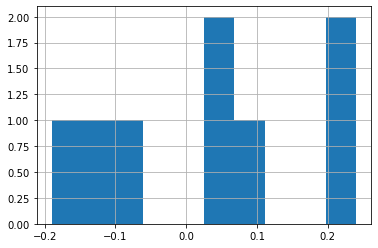

In [16]:
filtered['t+1'].hist()

<AxesSubplot:>

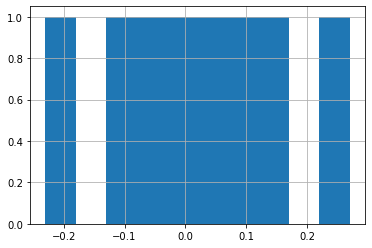

In [17]:
filtered['t+2'].hist()

<AxesSubplot:>

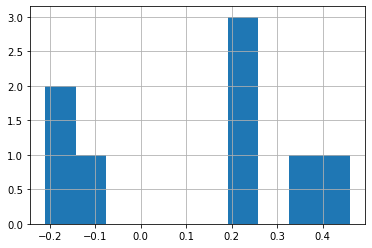

In [18]:
filtered['t+4'].hist()

In [389]:
df['doji'] = talib.C(df['open'], df['high'], df['low'], df['close'])
df['harami'] = talib.CDLHARAMI(df['open'], df['high'], df['low'], df['close'])
df['kick'] = talib.CDLKICKING(df['open'], df['high'], df['low'], df['close'])
df['piecing'] = talib.CDLPIERCING(df['open'], df['high'], df['low'], df['close'])
df['englufing'] = talib.CDLENGULFING(df['open'], df['high'], df['low'], df['close'])
df['hammer'] = talib.CDLHAMMER(df['open'], df['high'], df['low'], df['close'])

AttributeError: module 'talib' has no attribute 'C'

In [19]:
df['morning_star'] = df['morning_star'].astype(bool)

In [20]:
matched_times = df[df['morning_star']]['time']

In [21]:
# Draw the lines for reference
shapes_list = []
annotation_list = []
for time in matched_times:
    shapes_list.append(dict(x0=time, x1=time, y0=0, y1=1, xref='x', yref='paper', line_width=1))
    annotation_list.append(dict(x=time, y=0.05, xref='x', yref='paper', showarrow=False, xanchor='left', text='Hammer'))

# Candle Chart
Draw for single day regarless of dates

In [22]:
fig = go.Figure()

fig.add_trace(go.Candlestick(x=df['time'],
        open=df['open'],
        high=df['high'],
        low=df['low'],
        close=df['close'],
        text=df['close']))

fig.update_layout(
    title=f'Analysis on {day}',
    yaxis_title='Price',
    shapes = shapes_list,
    annotations=annotation_list
)

import plotly.io as pio
pio.renderers.default = 'browser'
pio.show(fig)

# Line Chart

In [13]:
line_data = df[['date', 'time' ,'average', 'open']].copy()

In [14]:
# Find the min open price
min_open_price = line_data['open'].min()

In [15]:
# To bring all open price to 0, subtract open price from average
line_data['avg_nor'] = line_data['average'] - line_data['open']

In [16]:
dates = sorted(line_data['date'].unique())

In [17]:
fig = go.Figure()

for date in dates:
    data = line_data[line_data['date'] == date]
    fig.add_trace(go.Scatter(x=data['time'], y=data['avg_nor'], name = date))

import plotly.io as pio
pio.renderers.default = 'browser'
pio.show(fig)